# Data for Classification

#### Import Dependancies

In [21]:
import numpy as np
from utils_common import dlc, plot_data, draw_vthresh
import matplotlib.pyplot as plt


plt.style.use('./deeplearning.mplstyle')

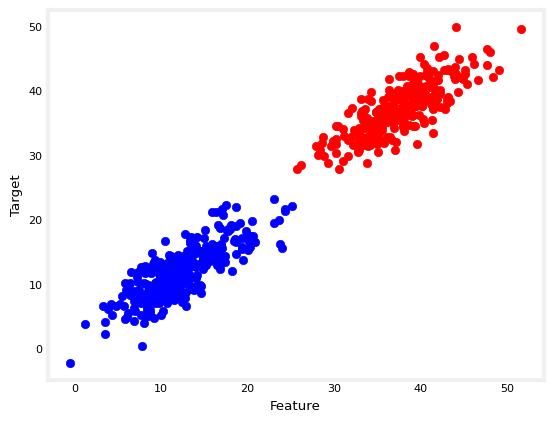

In [22]:
# Linear Regression For Classification
correlation = 0.8       # Correlation between -1 and 1
n = 300                 # Sample

xx = np.array([25, 50])
yy = np.array([25, 50])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
covs = [[stds[0]**2, stds[0]*stds[1]*correlation], 
[stds[0]*stds[1]*correlation, stds[1]**2]] 
m = np.random.multivariate_normal(means, covs, n).T

xx = np.array([0, 25])
yy = np.array([0, 25])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
covs = [[stds[0]**2, stds[0]*stds[1]*correlation], 
[stds[0]*stds[1]*correlation, stds[1]**2]] 
n = np.random.multivariate_normal(means, covs, n).T

plt.xlabel("Feature")
plt.ylabel("Target")
plt.scatter(m[0], m[1], color='red')
plt.scatter(n[0], n[1], color='blue')
plt.show()

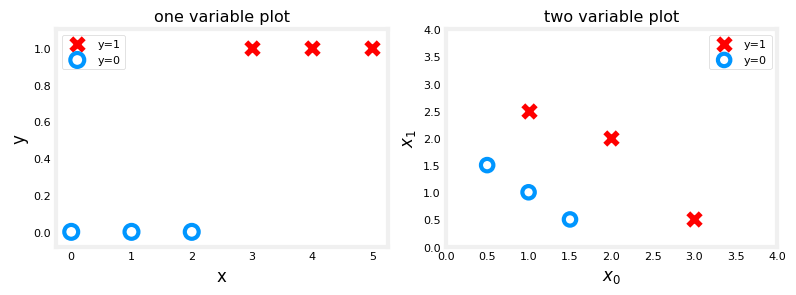

In [23]:
# Visualise classification
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', edgecolors=dlc["dlblue"],lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

#plot 2, two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()

A simple logistic function

$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, to predict $y$ given $x$

| Symbol | |
| --- | --- |
| $f$ | A function indicating a rule that assigns a unique output value (y) for each input value (x) |
| $w$ | Weight is the importance or influence of each feature on the prediction |
| $b$ | Bias is a constant that shifts the decision boundary |
| $x$ | Feature(s) |

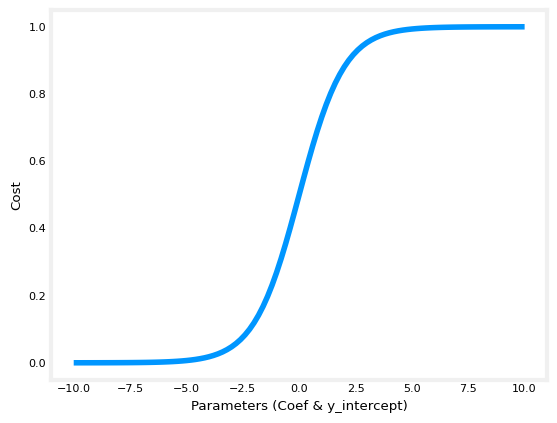

In [24]:
#Sigmoid
x = np.linspace(-10, 10, 101)
y = x**7 + 0.1*x + 2  

plt.xlabel("Parameters (Coef & y_intercept)")
plt.ylabel("Cost")
plt.plot(x, 1/(1+np.exp(-x)))
plt.show()

In [25]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

In [26]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3) 
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


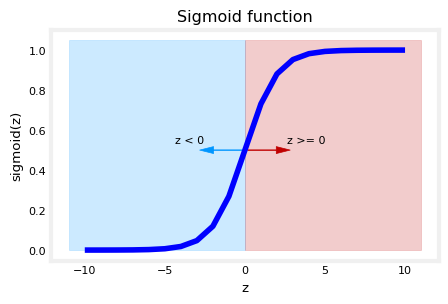

In [27]:
# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)